# Introduction
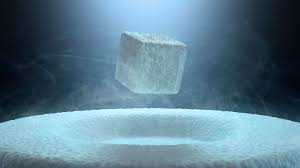

A superconductor is a substance that conducts electricity without resistance when it becomes colder than a "critical temperature. The intention of this Notebook is do an Expolatory Data Analysis on the given data and:
* Find the factors the affects Tc.
* Visualizing the given data in 2D in space using PCA.
* Develope and compare Various models for predicting Tc.

In [1]:
# importing the essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import torch
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [4]:
# loading data
dataFrame = pd.read_csv('/content/drive/MyDrive/DA/Composit/train.csv')

#doing a sanity check
dataFrame[0:10]

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   
5                   4         88.944468             57.795044   
6                   4         88.944468             57.682296   
7                   4         76.517718             57.175142   
8                   4         76.517718             56.808817   
9                   4         76.517718             56.442492   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   
5          66.361592              36.098926             1.181795   
6          66.361592              36.069470             1.181795   
7          59.310096              35.891368             1.197273   
8          59.310096              35.773432             1.197273   
9          59.310096              35.655884             1.197273   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   
5                 1.225203          122.90607              20.687458   
6                 1.316857          122.90607              10.765639   
7                 0.943560          122.90607              36.451199   
8                 0.981880          122.90607              34.833160   
9                 1.016495          122.90607              33.215121   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   
5        51.968828  ...          2.214286       2.213364           2.181543   
6        51.968828  ...          2.142857       2.213364           2.119268   
7        44.289459  ...          2.271429       2.213364           2.232679   
8        44.289459  ...          2.264286       2.213364           2.226222   
9        44.289459  ...          2.257143       2.213364           2.219783   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   
5         1.368922             1.141474              1           1.000000   
6         1.368922             1.194453              1           0.857143   
7         1.368922             1.029175              1           1.114286   
8         1.368922             1.048834              1           1.100000   
9         1.368922             1.066221              1           1.085714   

   std_Valence  wtd_std_Val

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Since All of our features numeric lets check the correlation of various parameters with Tc

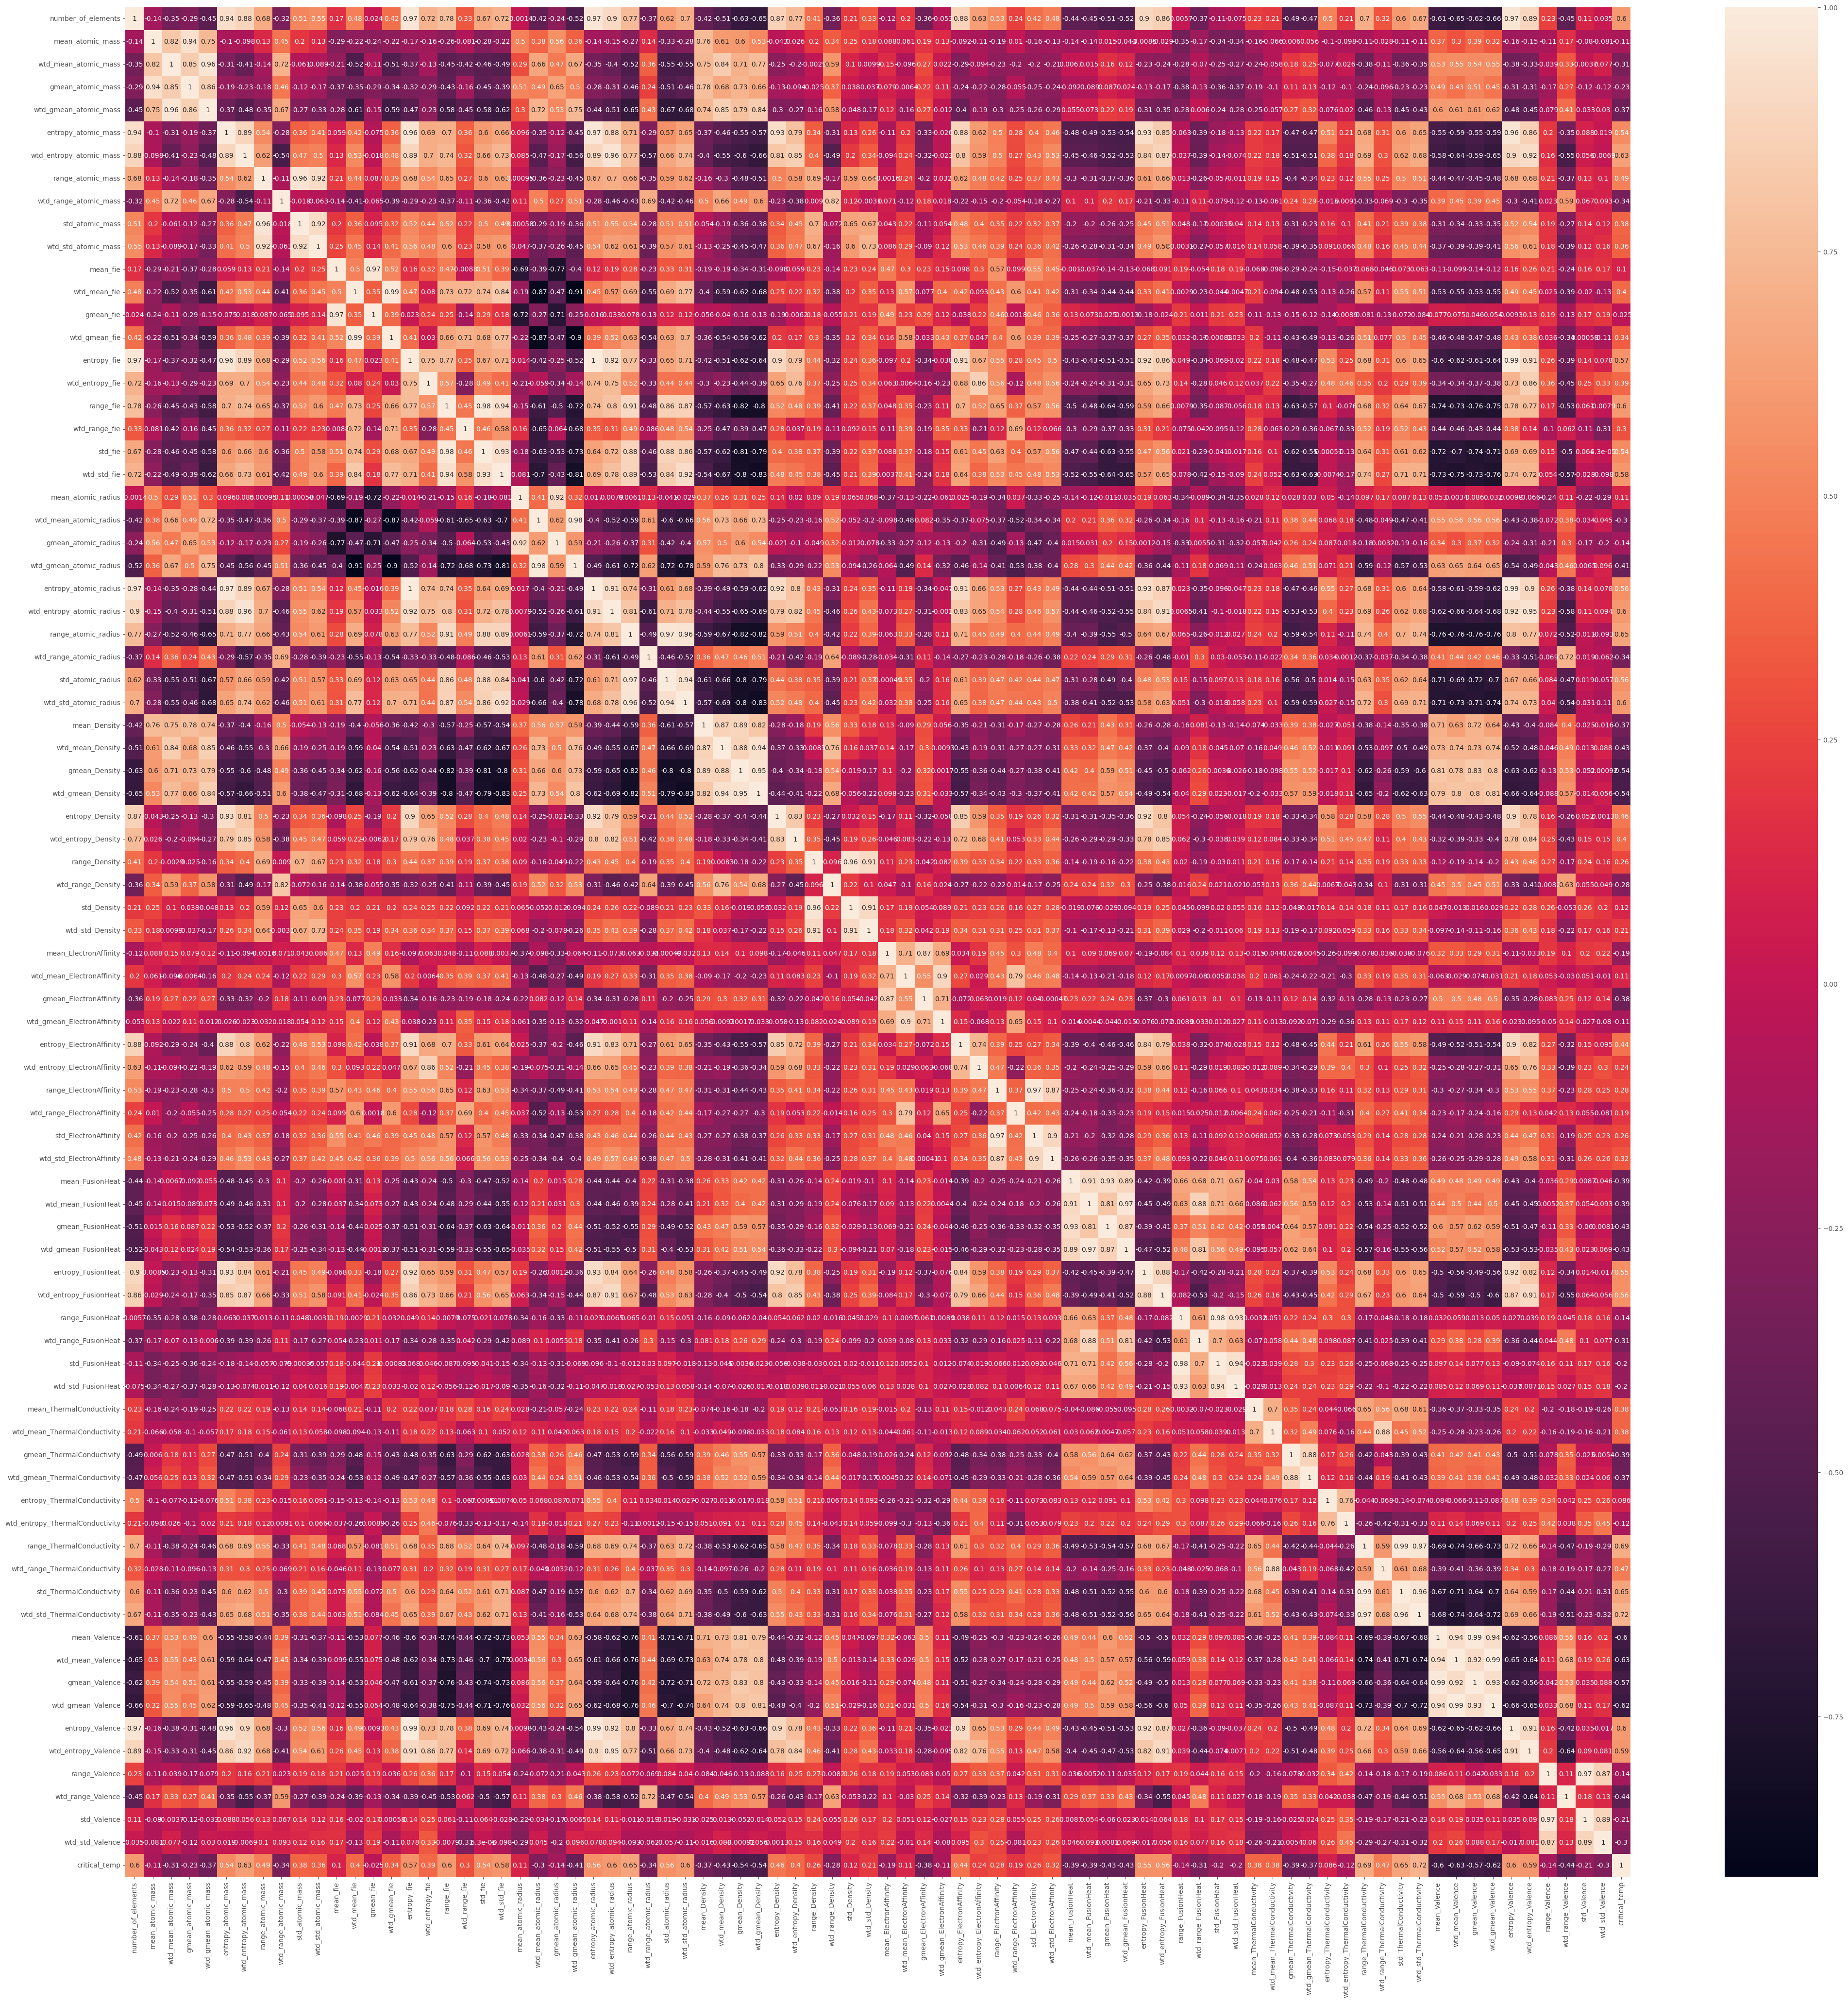

In [5]:
plt.style.use('ggplot')
plt.figure(figsize = (50, 50))
sb.heatmap(dataFrame.corr(), annot= True)
plt.show()

# Inference from Correlation Plot
From the above heatmap we can see Tc has **High Positive Correlation**  with the following features:
* Number of Elements           (0.60)
* Entropy_atomic_mass          (0.54)
* wtd_entropy_atomic mass      (0.63)
* range_atomic_mass            (0.49)
* entropy_fie                  (0.57)
* range_fie                    (0.6)
* std_fie                      (0.54)
* wtd_std_fie                  (0.58)
* entropy_atomic_radius        (0.56)
* wtd_entropy_atomic_radius    (0.6)
* range_atomic_radius          (0.65)
* std_atomic_radius            (0.56)
* wtd_std_atomic_radius        (0.60)
* entropy_fusion_heat          (0.55)
* wtd_entropy_fusion_heat      (0.56)
* range_thermal_conductivity   (0.69)
* std_thermal_conductivity     (0.65)
* wtd_std_thermal_conductivty  (0.72)
* entropy_valence              (0.56)
* wtd_entropy_valence          (0.6)

And with Following features Tc has **Strong negative Correlation** :
* gmean_density     (-0.54)
* wtd_gmean_density (-0.54)
* mean_valence      (-0.60)
* wtd_mean_valence  (-0.63)
* gmean_valence     (-0.57)
* wtd_gmean_valence (-0.62)


Commentary: This dataset is highly correlated we might not be having any major problems developing a model for this data!

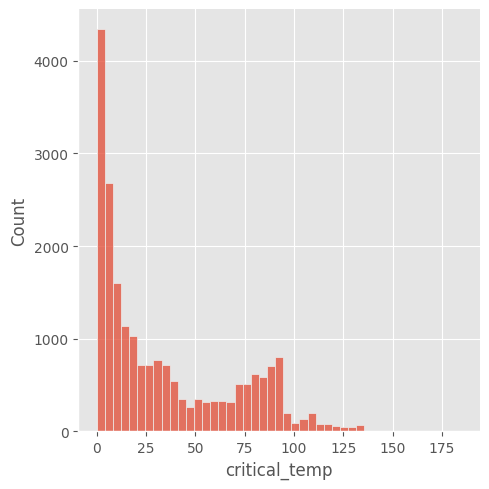

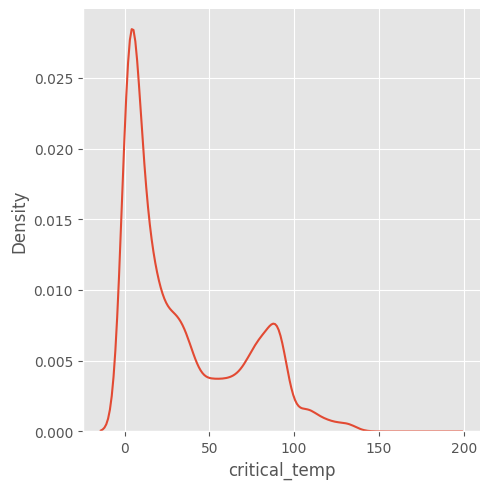

In [6]:
# lets try to visualize range of tc, it's distribution and outliers
sb.displot(data = dataFrame, x = 'critical_temp')
sb.displot(data = dataFrame, x = 'critical_temp', kind = 'kde')


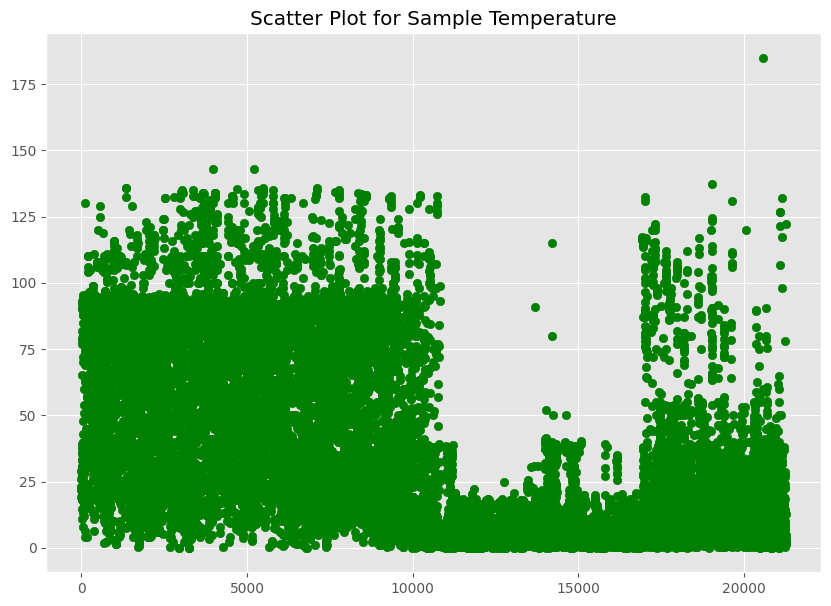

In [7]:
# plotting scatter plot for sample's Temperature
plt.style.use('ggplot')
plt.figure(figsize = (10, 7))
plt.scatter(dataFrame.index, dataFrame['critical_temp'], color = 'green')
plt.title('Scatter Plot for Sample Temperature')
plt.show()

# 2D visualization of dataset using Dimentionality Reduction


In [8]:
featuresNeeded = dataFrame.columns[: -1]

features = np.array (dataFrame[featuresNeeded])
targets =  np.array(dataFrame['critical_temp'])

# let standardize our feature Vector First for PCA and futher usage
from sklearn.preprocessing import StandardScaler
stdc = StandardScaler()
features = stdc.fit_transform(features)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(features)
dimReducedFrame = pca.transform(features)

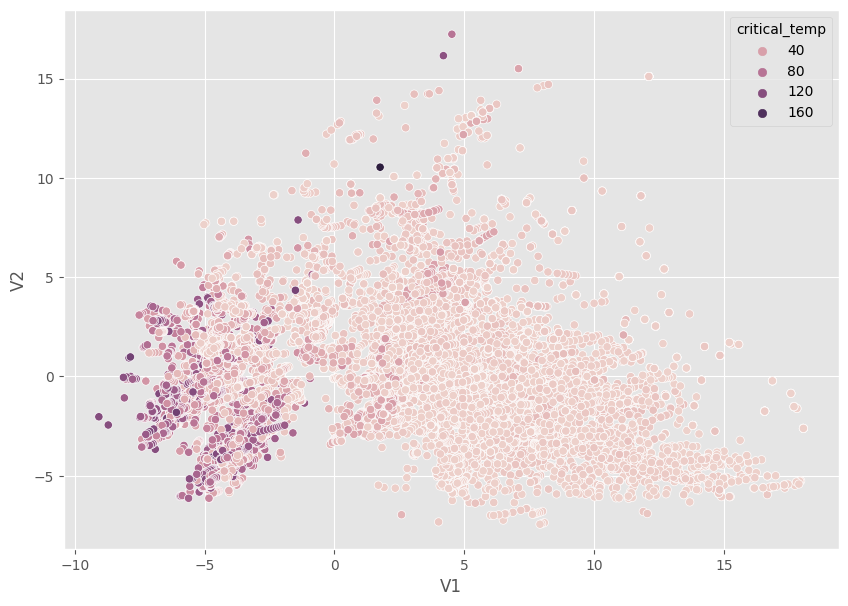

In [9]:
# converting to dataFrame and Plotting
dimReducedFrame = pd.DataFrame(dimReducedFrame)
dimReducedFrame = dimReducedFrame.rename(columns = {0: 'V1', 1 : 'V2'})
dimReducedFrame['critical_temp'] = targets

# Plotting
plt.figure(figsize = (10, 7))
sb.scatterplot(data = dimReducedFrame, x = 'V1', y = 'V2', hue = 'critical_temp')
plt.grid(True)
plt.show()



```
# This is formatted as code
```

Inference: This looks like Sample with higher Tc values tends to have low values for V1 (first principal component) and V2 (second principal component) with exceptions. Let's check this infernce with regplots.

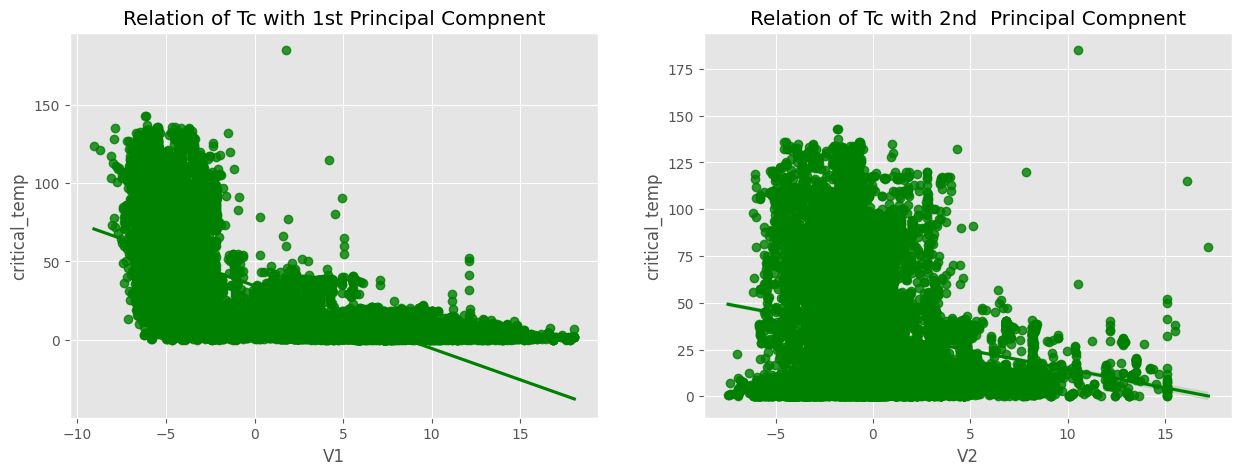

In [10]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sb.regplot(data = dimReducedFrame, x = 'V1', y = 'critical_temp' , color = 'green')
plt.title('Relation of Tc with 1st Principal Compnent')

plt.subplot(1, 2, 2)
sb.regplot(data = dimReducedFrame, x = 'V2', y = 'critical_temp' , color = 'green')
plt.title('Relation of Tc with 2nd  Principal Compnent')


plt.show()

In [11]:
# Running some Pandas Queries 

l0 = len (dataFrame[ (dataFrame['critical_temp'] >= 0) & 
                     (dataFrame['critical_temp'] <= 49)
                   ]
         )

print ('Number of samples with Tc in range 0 K- 49 K:   {}'.format(l0))


l1 = len (dataFrame[ (dataFrame['critical_temp'] >= 50) & 
                     (dataFrame['critical_temp'] <= 100)
                   ]
         )

print ('Number of samples with Tc in range 50 K- 100 K:   {}'.format(l1))


l2 = len (dataFrame[ (dataFrame['critical_temp'] >= 101) & 
                     (dataFrame['critical_temp'] <= 140)
                   ]
         )

print ('Number of samples with Tc in range 101 K- 140 K:   {}'.format(l2))


l3 = len (dataFrame[ (dataFrame['critical_temp'] >= 140) & 
                     (dataFrame['critical_temp'] <= 150)
                   ]
         )

print ('Number of samples with Tc in range 141 K- 150 K:   {}'.format(l3))

l4 = len (dataFrame[ (dataFrame['critical_temp'] >= 151)])

print ('Number of samples with Tc greater than 150K: {}'.format(l4))


Number of samples with Tc in range 0 K- 49 K:   14855
Number of samples with Tc in range 50 K- 100 K:   5611
Number of samples with Tc in range 101 K- 140 K:   760
Number of samples with Tc in range 141 K- 150 K:   2
Number of samples with Tc greater than 150K: 1


# Inference from distributions
From the above distribution Plot we can infer:
* A majority of the samples in our data set has very low Tc (14855 samples to be precise).
* 5611 samples have Tc between 50K - 100K .
* 760 samples have Tc between 101K - 140 K.
* 2 samples have Tc between 141K - 150K.
* only 1 sample has Tc greater than 150K.

# Developing Models & Usual sklearn stuff..

In [12]:
# normalizing our targets
maxTc = max(targets)
targets = targets/1

# splitting data into train and test frame
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(features, targets, test_size = 0.2, random_state = 42)


In [13]:
# writting Function to visualize our models performance
from sklearn.metrics import mean_squared_error as mse
def PerformanceCalculator(trueVals, predVals, name):
    plt.plot([0,0.001,0.01,1], [0,0.001,0.01,1], color = 'blue')
    plt.scatter(trueVals, predVals, color = 'green')
    er = mse(trueVals, predVals)
    er = pow(er, 0.5)
    er = int(er * 10000) / 10000
    plt.title('RMSE: ' + str(er) + ' for '+ name)
    plt.show()
    
    

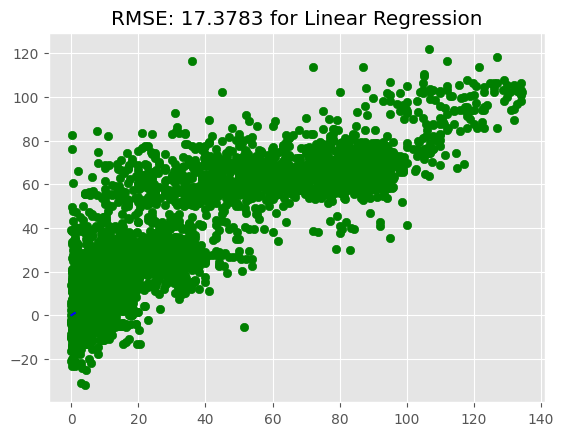

In [14]:
# lets start our Analysis with linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xTrain, yTrain)

predictions = lr.predict(xTest)
PerformanceCalculator(yTest, predictions, 'Linear Regression')

In [ ]:
# lets do one better by using a decission Tree
from sklearn.tree import DecisionTreeRegressor
lr = DecisionTreeRegressor()
lr.fit(xTrain, yTrain)

predictions = lr.predict(xTest)
PerformanceCalculator(yTest, predictions, 'Decission Tree Regressor')

In [ ]:
# Decission Tree looks an improvement over linear regression
# observe alot more samples are now along y = x line which is a good sign
# lets Try gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
lr = GradientBoostingRegressor()

lr.fit(xTrain, yTrain)

predictions = lr.predict(xTest)
PerformanceCalculator(yTest, predictions, 'Gradient Boosting Regressor')

In [ ]:
# lets try Random Forest
from sklearn.ensemble import RandomForestRegressor

lr1 = RandomForestRegressor()
lr1.fit(xTrain, yTrain)

predictions = lr1.predict(xTest)
PerformanceCalculator(yTest, predictions, 'Random Forest Regressor')

In [ ]:
# lets try Random Forest
from sklearn.ensemble import RandomForestRegressor

lr1 = RandomForestRegressor(n_estimators=200)
lr1.fit(xTrain, yTrain)

predictions = lr1.predict(xTest)
PerformanceCalculator(yTest, predictions, 'Random Forest Regressor')

In [ ]:
# lets try Random Forest
from sklearn.ensemble import RandomForestRegressor

lr1 = RandomForestRegressor(n_estimators=200)
lr1.fit(xTrain, yTrain)

predictions = lr1.predict(xTest)
PerformanceCalculator(yTest, predictions, 'Random Forest Regressor')

In [ ]:
# Let's try bagging classifier
from sklearn.ensemble import BaggingRegressor
lr = BaggingRegressor()

#lr = RandomForestRegressor()
lr.fit(xTrain, yTrain)

predictions = lr.predict(xTest)
PerformanceCalculator(yTest, predictions, 'Bagging Regressor')

In [ ]:
# lets try ensembling
pred1 = lr1.predict(xTest)
pred2 = lr.predict(xTest)
predictions = (pred1 + pred2)/ 2

PerformanceCalculator(yTest, predictions, '(Random Forest + Bagging)')

In [ ]:
# lets try MLP regressor
from sklearn.neural_network import MLPRegressor
lr = MLPRegressor(hidden_layer_sizes=(100,200,50), max_iter=300, learning_rate_init=0.003)

lr.fit(xTrain, yTrain)

predictions = lr.predict(xTest)
print('final loss is ', lr.loss_)
PerformanceCalculator(yTest, predictions, 'MLP Regressor')

In [ ]:
lr = MLPRegressor(hidden_layer_sizes=(100,200,50),solver='lbfgs', max_iter=400, learning_rate_init=0.0003)

lr.fit(xTrain, yTrain)

predictions = lr.predict(xTest)
print('final loss is ', lr.loss_)
PerformanceCalculator(yTest, predictions, 'MLP Regressor')

In [ ]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('random forest reg.', lr1), ('bagging reg.', lr)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [ ]:
#fit model to training data
ensemble.fit(xTrain, yTrain)
#test our model on the test data
ensemble.score(xTest, yTest)

# Grid search for Random Forest

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 3, 6, 9],
    'max_leaf_nodes': [None, 3, 6, 9],
}

In [ ]:
grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=param_grid)
grid_search.fit(xTrain, yTrain)
print(grid_search.best_estimator_)

In [ ]:
grid_search.best_params_

# True values, Predicted values, errors for Random Forest

In [ ]:
ylab = yTest
predVals = lr1.predict(xTest)

diff = abs(ylab - predVals)
ansFrame = {
    'True Tc' :  ylab,
    'Predicted Tc': predVals,
    'Absolute error': diff
}

ansFrame = pd.DataFrame(ansFrame)
ansFrame[0:20]

In [ ]:
ylab = yTest
predVals = lr.predict(xTest)

diff = abs(ylab - predVals)
ansFrame = {
    'True Tc' :  ylab,
    'Predicted Tc': predVals,
    'Absolute error': diff
}

ansFrame = pd.DataFrame(ansFrame)
ansFrame[0:20]

Thanks for Reading...